In [ ]:
!gzip Parking_Violations_Issued_-_Fiscal_Year_2018.csv

In [83]:
!gzip Open_Parking_and_Camera_Violations.csv


In [84]:
df0  = pd.read_csv(
    'Open_Parking_and_Camera_Violations.csv.gz', 
    low_memory=True
)

In [86]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26915398 entries, 0 to 26915397
Data columns (total 19 columns):
Plate                  object
State                  object
License Type           object
Summons Number         int64
Issue Date             object
Violation Time         object
Violation              object
Judgment Entry Date    object
Fine Amount            object
Penalty Amount         object
Interest Amount        object
Reduction Amount       object
Payment Amount         object
Amount Due             object
Precinct               float64
County                 object
Issuing Agency         object
Violation Status       object
Summons Image          object
dtypes: float64(1), int64(1), object(17)
memory usage: 3.8+ GB


In [1]:
import pandas as pd

import time
t0 = time.time()

# Takes about 6 minutes to load into memory, 
# most of that time is due to datetime parsing
df = pd.read_csv(
    'Parking_Violations_Issued_-_Fiscal_Year_2018.csv.gz', 
    low_memory=True,
    parse_dates=['Issue Date']
)

df.info()

/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8643265 entries, 0 to 8643264
Data columns (total 43 columns):
Summons Number                       int64
Plate ID                             object
Registration State                   object
Plate Type                           object
Issue Date                           datetime64[ns]
Violation Code                       int64
Vehicle Body Type                    object
Vehicle Make                         object
Issuing Agency                       object
Street Code1                         int64
Street Code2                         int64
Street Code3                         int64
Vehicle Expiration Date              int64
Violation Location                   float64
Violation Precinct                   int64
Issuer Precinct                      int64
Issuer Code                          int64
Issuer Command                       object
Issuer Squad                         object
Violation Time                       object
Time Fi

In [2]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.rcParams["figure.figsize"] = (10, 5)


In [3]:
df['weekday'] = df['Issue Date'].dt.dayofweek


In [5]:
groups = df.groupby('weekday')
out = {}
for name, group in groups:
    temp = group['Violation Code'].value_counts()
    out[name] = temp
df1 = pd.DataFrame(out)



In [32]:
df2 = df1[df1[0] > 50000]


<bound method DataFrame.sum of          0.0       1.0       2.0       3.0       4.0       5.0      6.0
14  114026.0  126507.0  128879.0  127460.0  120992.0   68535.0  48334.0
20  107995.0  121485.0  126245.0  121348.0  113759.0   65604.0  42070.0
21  247473.0  307867.0  124571.0  261613.0  263207.0   76641.0    523.0
36  175425.0  180973.0  175416.0  170580.0  154145.0       1.0      NaN
37   58934.0   73744.0   77344.0   75213.0   65525.0   55991.0     12.0
38  132811.0  145681.0  155123.0  149170.0  139039.0  173524.0     68.0
40   55120.0   67879.0   71489.0   65941.0   63900.0   66811.0  47119.0
46   67888.0   88772.0   85231.0   86548.0   81323.0   41496.0  17801.0
71   62047.0   69452.0   71134.0   69286.0   62949.0   64574.0  30262.0>

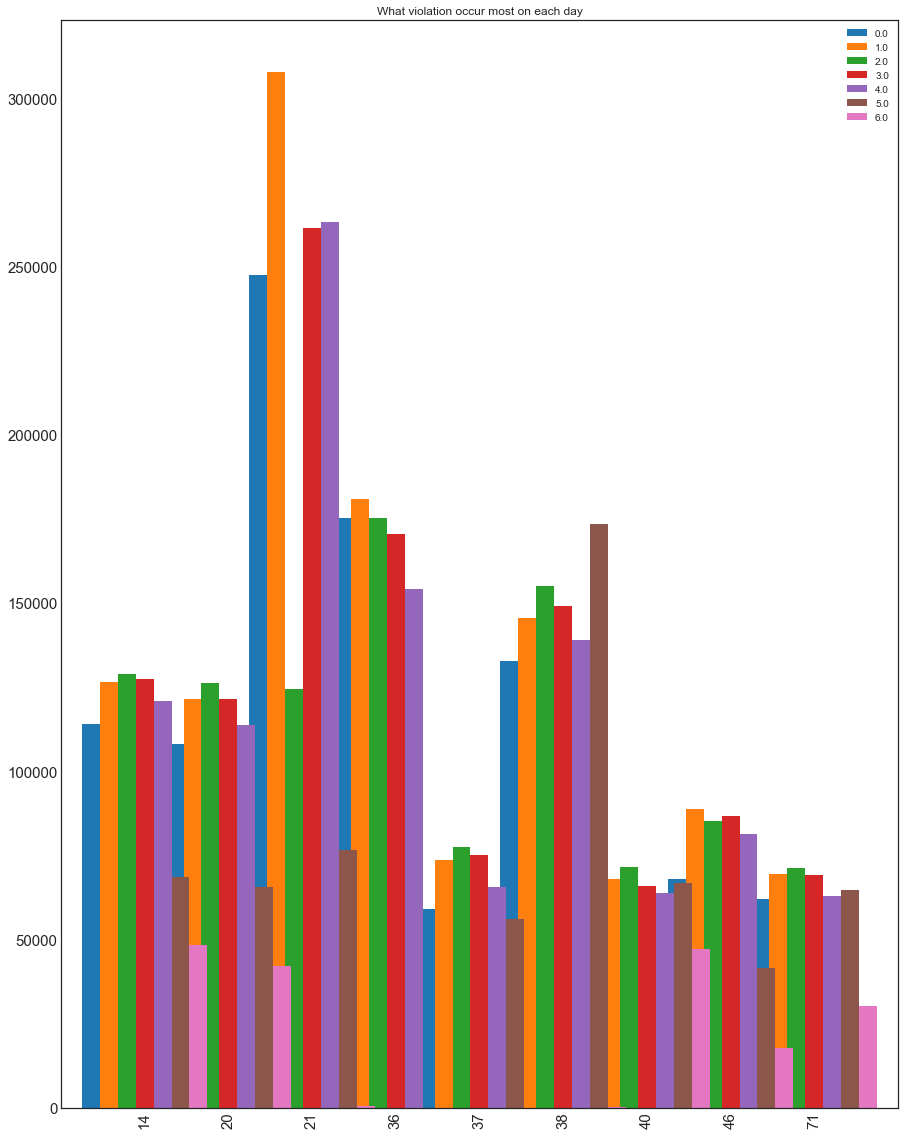

In [42]:
df2 = df1[df1[0] > 50000]

df2.plot.bar(figsize=(15,20), title='What violation occur most on each day', fontsize=15, width = 1.5)

##Sunday -14; Monday- 21; Tuesday - 21; Wednesday  - 36; Thursday - 21; Friday - 21; Saturday - 38


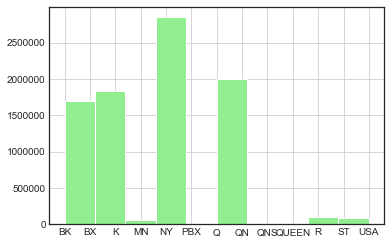

In [4]:
df['Violation County'].hist(edgecolor='white',
    color='lightgreen')

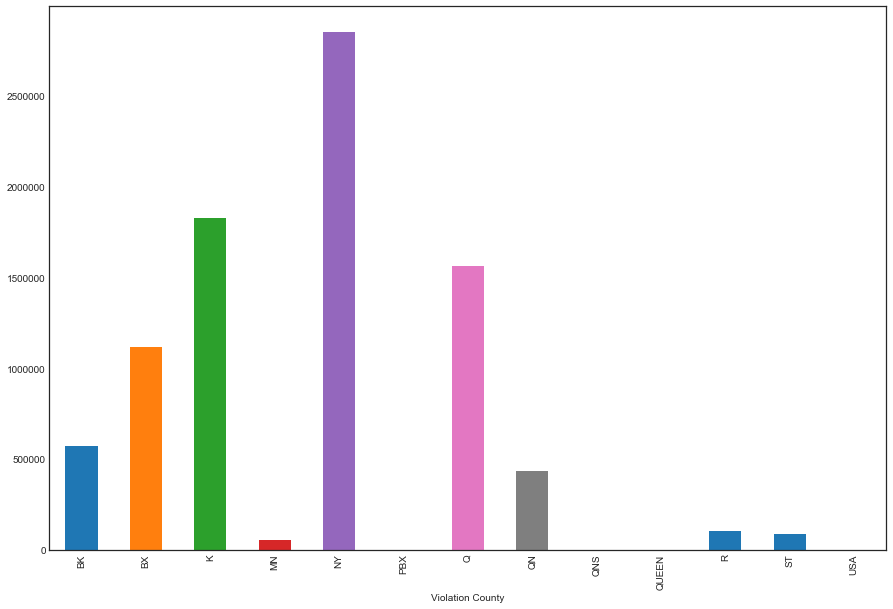

In [33]:
county = df.groupby('Violation County')['Summons Number'].count()
county.plot.bar(figsize=(15,10))

In [36]:
df3 = groups['Summons Number'].count()


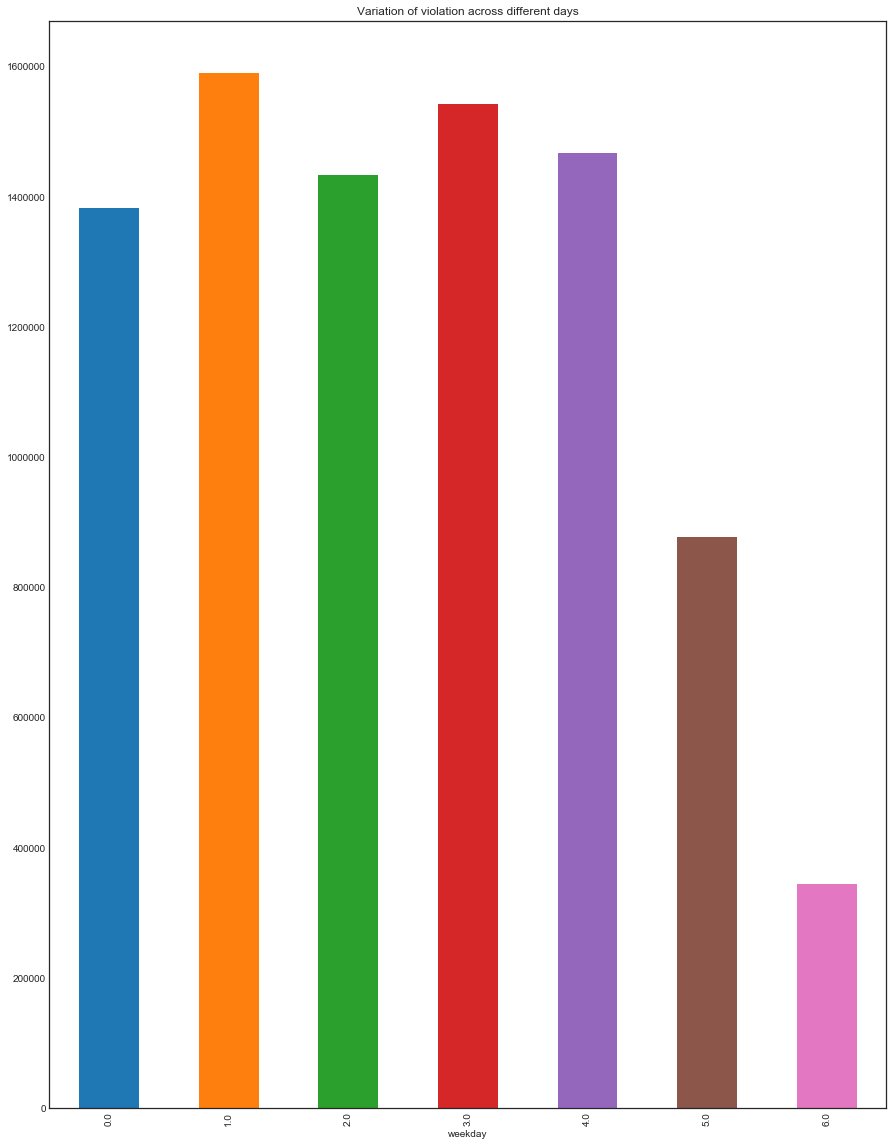

In [38]:
df3.plot.bar(figsize=(15,20), title='Variation of violation across different days')

In [39]:
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,weekday
0,1398749692,HXL0464,PA,PAS,2017-06-24,14,VAN,JEEP,P,38430,...,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN,5.0
1,1398751765,HSL6756,NY,PAS,2017-07-11,16,SDN,NISSA,P,13610,...,0.0,2017,-,0,NaN,NaN,NaN,NaN,NaN,1.0
2,1398759193,GWY8601,NY,PAS,2017-07-10,51,SUBN,BMW,P,0,...,0.0,2005,-,0,NaN,NaN,NaN,NaN,NaN,0.0
3,1399031417,K518GN,NY,999,2017-07-14,21,SDN,NISSA,S,26790,...,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN,4.0
4,1399031466,HDG7313,NY,PAS,2017-07-03,21,SDN,VOLKS,S,21790,...,0.0,2008,-,0,NaN,NaN,NaN,NaN,NaN,0.0


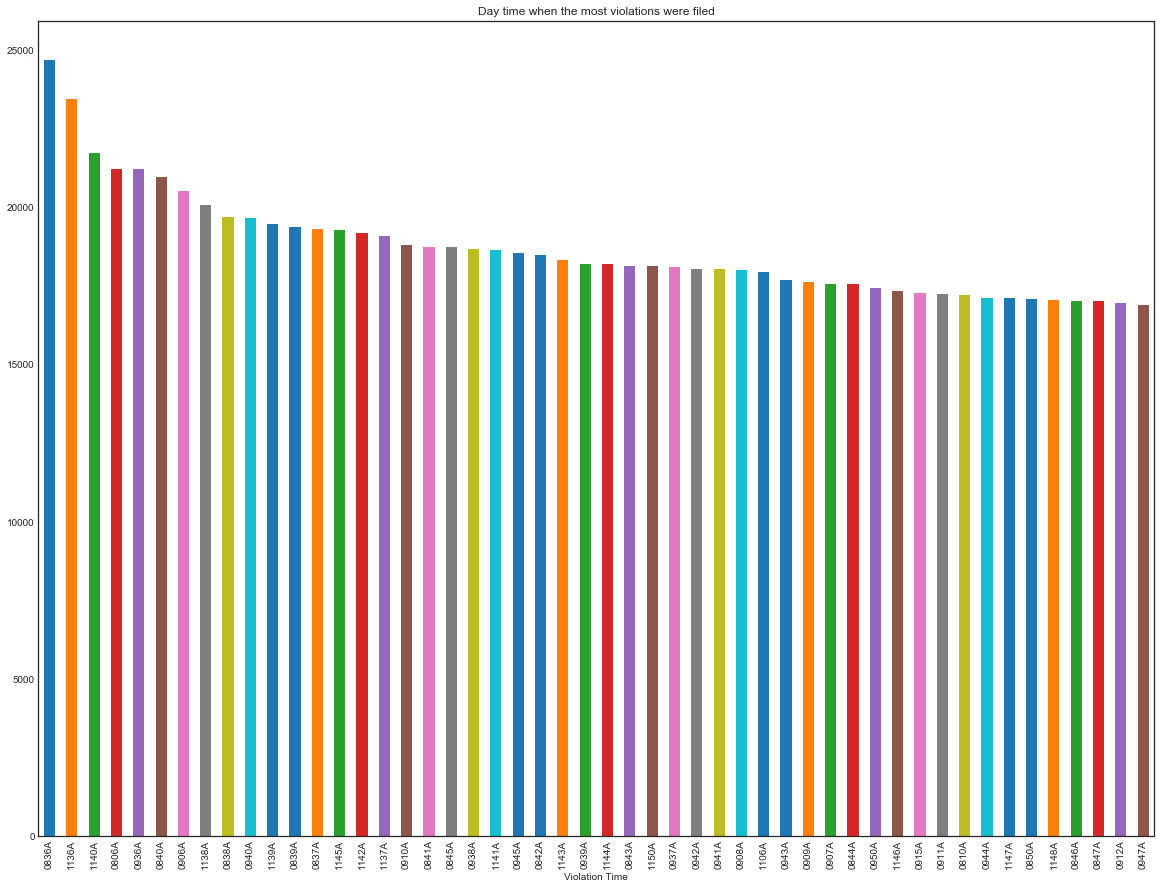

In [79]:
df4 = df.groupby('Violation Time')['Summons Number'].count().sort_values(ascending=False)
#df4.sort_values('Violation Time', ascending=False)
df4[0:50].plot.bar(figsize=(20,15), title='Day time when the most violations were filed')

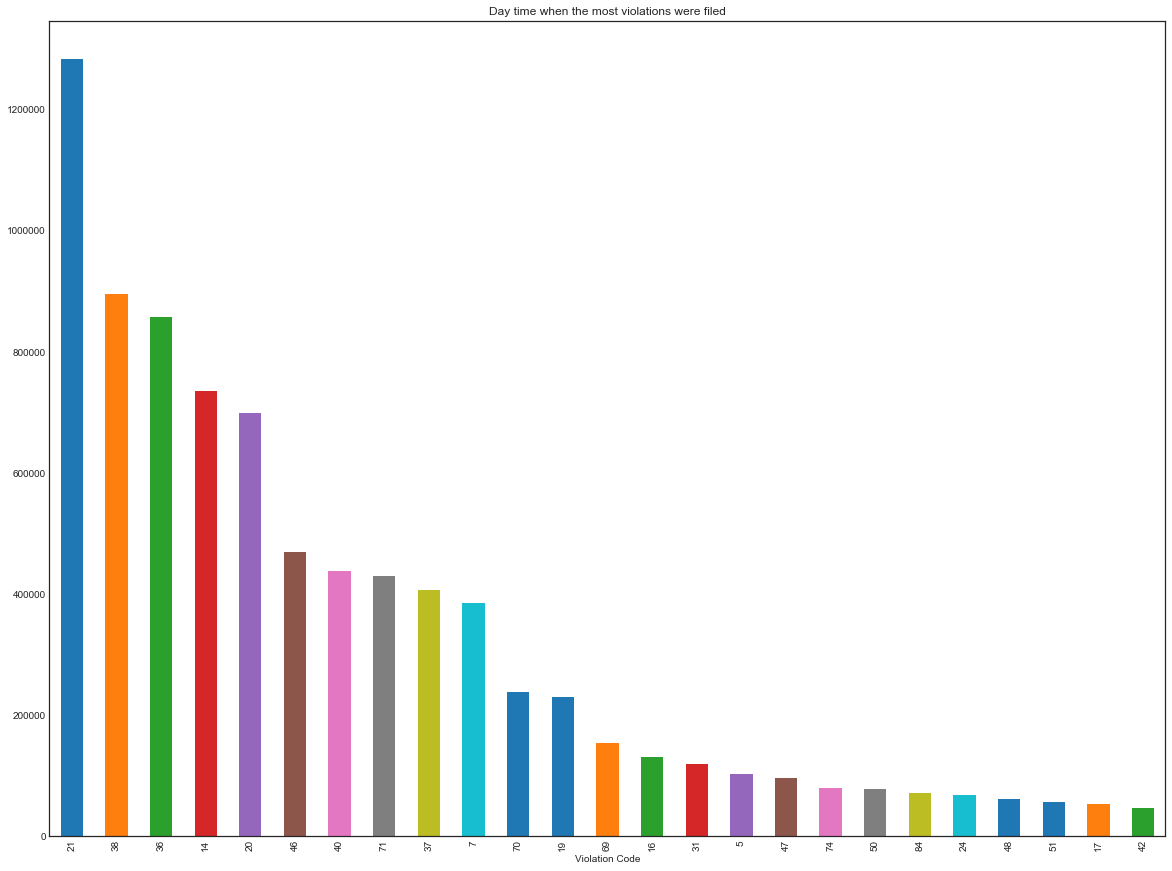

In [82]:
df5 = df.groupby('Violation Code')['Summons Number'].count().sort_values(ascending=False)
df5[0:25].plot.bar(figsize=(20,15), title='Day time when the most violations were filed')

# 21 : NO PARKING-STREET CLEANING
# 38 : FAIL TO DSPLY MUNI METER RECPT
# 36 : PHTO SCHOOL ZN SPEED VIOLATION
# 14 : NO STANDING-DAY/TIME LIMITS
# 20 : NO PARKING-DAY/TIME LIMITS

In [87]:
df0.head()

,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Judgment Entry Date,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status,Summons Image
0,HDD3513,NY,PAS,7637087220,09/29/2016,02:33P,FAIL TO DSPLY MUNI METER RECPT,01/19/2017,$65.00,$60.00,$3.06,$128.06,$0.00,$0.00,5.0,NY,TRAFFIC,ADMIN CLAIM GRANTED,View Summons (http://nycserv.nyc.gov/NYCServWe...
1,HGU2372,NY,PAS,1420655231,05/15/2017,11:06P,FIRE HYDRANT,NaN,$115.00,$0.00,$0.00,$0.00,$115.00,$0.00,104.0,Q,POLICE DEPARTMENT,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
2,AK12136,CT,PAS,8635915148,03/09/2018,09:13P,FAIL TO DSPLY MUNI METER RECPT,NaN,$35.00,$0.00,$0.00,$0.00,$35.00,$0.00,52.0,BX,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
3,HDS8756,NY,PAS,8635915320,03/10/2018,00:14A,NO PARKING-STREET CLEANING,NaN,$45.00,$0.00,$0.00,$0.00,$45.00,$0.00,52.0,BX,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
4,ZDR77L,NJ,PAS,8636022691,03/09/2018,09:10A,NO PARKING-STREET CLEANING,NaN,$45.00,$0.00,$0.00,$0.00,$45.00,$0.00,79.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...


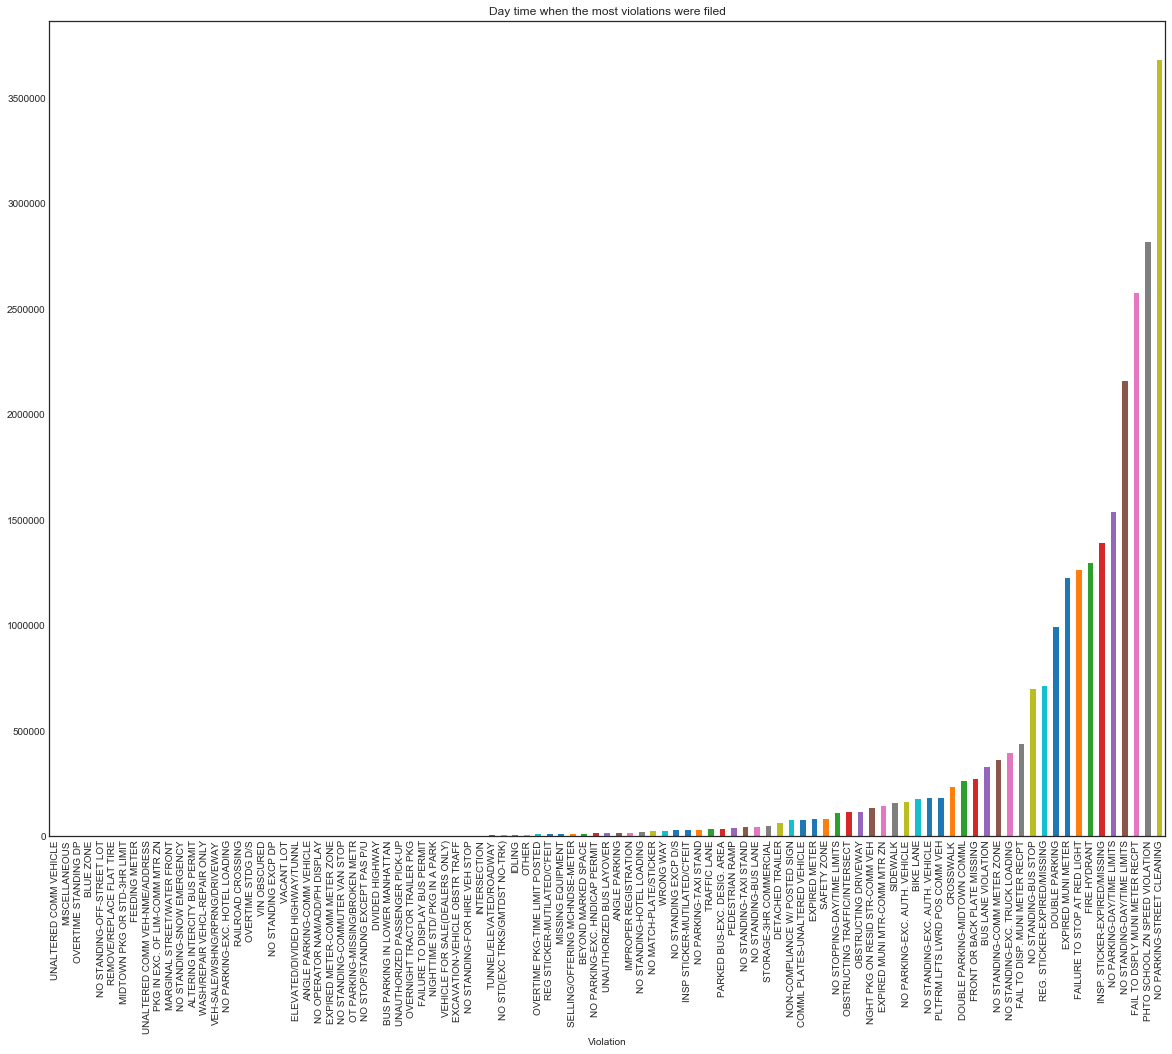

In [93]:
df6 = df0.groupby('Violation')['Summons Number'].count().sort_values(ascending=False)
df6.plot.bar(figsize=(20,15), title='What are the most common violations filed')

In [ ]:
df7 = df0.groupby('Violation')['Fine Amount'].sum().sort_values()
df7.plot.bar(figsize=(20,15), title='Day time when the most violations were filed')